In [ ]:
#linear regression

In [ ]:
#1.Take the dataset and create dataframe
import pandas as pd
df = pd.read_csv('/content/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.size

10000

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


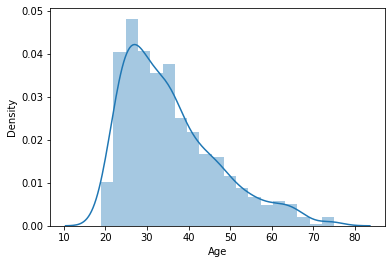

In [ ]:
#visualization
import seaborn as sns
sns.distplot(df['Age'])

In [ ]:
#now we only want to consider numerical data
#so we will get a new dataframe
df_num_data = df.select_dtypes(include=['float64','int64'])
df_num_data

,Unnamed: 0,Age,Job,Credit amount,Duration
0,0,67,2,1169,6
1,1,22,2,5951,48
2,2,49,1,2096,12
3,3,45,2,7882,42
4,4,53,2,4870,24
...,...,...,...,...,...
995,995,31,1,1736,12
996,996,40,3,3857,30
997,997,38,2,804,12
998,998,23,2,1845,45


In [ ]:
#now we are going to remove those columns which are of less importance
df_num_data
df_num_data= df_num_data.drop(["Unnamed: 0","Job"],axis = 1)
df_num_data
#throwing error because the data is removed earlier and now it is not present there.


,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [ ]:
df_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   Credit amount  1000 non-null   int64
 2   Duration       1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
x = df_num_data.iloc[:,0:1].values
x

In [ ]:
y = df_num_data.iloc[:,1].values
y

array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  2333,  5965,  1262,  3378,
        2225,   783,  6468,  9566,  1961,  6229,  1391,  1537,  1953,
       14421,  3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,
        1164,  5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,
        1213,  1568,  1755,  2315,  1412,  1295, 12612,  2249,  1108,
         618,  1409,   797,  3617,  1318, 15945,  2012,  2622,  2337,
        7057,  1469,  2323,   932,  1919,  2445, 11938,  6458,  6078,
        7721,  1410,  1449,   392,  6260,  7855,  1680,  3578,  7174,
        2132,  4281,  2366,  1835,  3868,  1768,   781,  1924,  2121,
         701,   639,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x.shape)#actual data
print(x_train.shape) #- 75%
print(x_test.shape)# - 25%


(1000, 1)
(750, 1)
(250, 1)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1000,)
(750,)
(250,)


In [ ]:
#normalization for more accurate answer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred#predicted answer

array([3212.48393354, 3183.7857735 , 3305.75295365, 3190.96031351,
       3298.57841364, 3305.75295365, 3298.57841364, 3363.14927372,
       3169.43669349, 3169.43669349, 3205.30939353, 3190.96031351,
       3427.72013379, 3277.05479361, 3190.96031351, 3183.7857735 ,
       3169.43669349, 3377.49835373, 3198.13485352, 3363.14927372,
       3190.96031351, 3183.7857735 , 3284.22933362, 3176.6112335 ,
       3463.59283383, 3355.97473371, 3248.35663358, 3248.35663358,
       3420.54559378, 3155.08761347, 3334.45111368, 3226.83301356,
       3155.08761347, 3277.05479361, 3183.7857735 , 3162.26215348,
       3262.7057136 , 3190.96031351, 3234.00755356, 3269.88025361,
       3183.7857735 , 3284.22933362, 3334.45111368, 3169.43669349,
       3327.27657367, 3162.26215348, 3183.7857735 , 3212.48393354,
       3269.88025361, 3147.91307346, 3212.48393354, 3183.7857735 ,
       3255.53117359, 3255.53117359, 3248.35663358, 3183.7857735 ,
       3255.53117359, 3226.83301356, 3456.41829383, 3190.96031

In [ ]:
y_test # actual answer

array([ 3959,  3577,  2515,  1995, 10366,  7393,   409,  2507,  4811,
        6560,  9034,  3552,  6468,  2522,  2820,   783,  3763,  7485,
        1403,  4771,  4020,  1201,  5381,  5511,  1098,  6224,  1393,
        1919,  5045,  5951,   731,   629,  1808,  1188,  3235, 11560,
        1154,  3850,  2359,  1533,  4210,  3857,  1393,  1800,  2251,
         836,  1345,  4795,   708,  1289,  1864,  9960,  5302,  1872,
        2439,  1388, 12169,  2662,  1409,  3643,  6758,  1851,  3416,
        5117,  1597,  1382,  1231,  2631,  2150,  2930,  6761,  2745,
        2325,  1204,  1049,  2292,  1449,  7511,   918,  2346,  1603,
        3905,  1126,  2923,  3195,  4716, 14555,  5493,  1585,  3590,
        2759,  2122,  2002,  1901,  1493,  1209,  3979,  7721,  3650,
        1880,  1941,   874,  5190, 10477,  4351,  1376,  3496,  5998,
        4006,  3342,  2622,  2384,  1659,  3488,  7418,  2238,  1333,
        1283,  3518,   585,  4933,  1278,  1768,  3349,  1391,  3422,
        2146,  1520,

In [ ]:
print(x_train[11])# this is a normalized form value

[0.39285714]


In [ ]:
model.predict([x_train[11]])

array([3267.57415146])

In [ ]:
x_train[100]

array([0.57142857])

In [ ]:
x_test[50]

array([0.22222222])